# PCA Data Wrangling of UsArrests
See "**Capstone Project II Report - UsArrests.docx**" for the report

In [156]:
import numpy as np
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# machine learning libraries
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
import scipy.cluster.hierarchy as sch


# ""!pip install yellowbrick" to install the visualizer
# generate the elbow clusters
from yellowbrick.cluster import KElbowVisualizer

# used for biplot
from yellowbrick.features import PCA as y_PCA

# set the theme
sns.set_style("darkgrid")

# =======| **Data Import** |=======

In [210]:
# import the dataset
data = pd.read_csv('UsArrests.csv')

# print the shape of the data frame and display top 5 rows
print(data.shape)
data.head()

(50, 5)


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# =======| **PreProcessing** |=======

In [158]:
# Check for duplicate names
data.City.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [159]:
# Check for null values
data.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<AxesSubplot:>

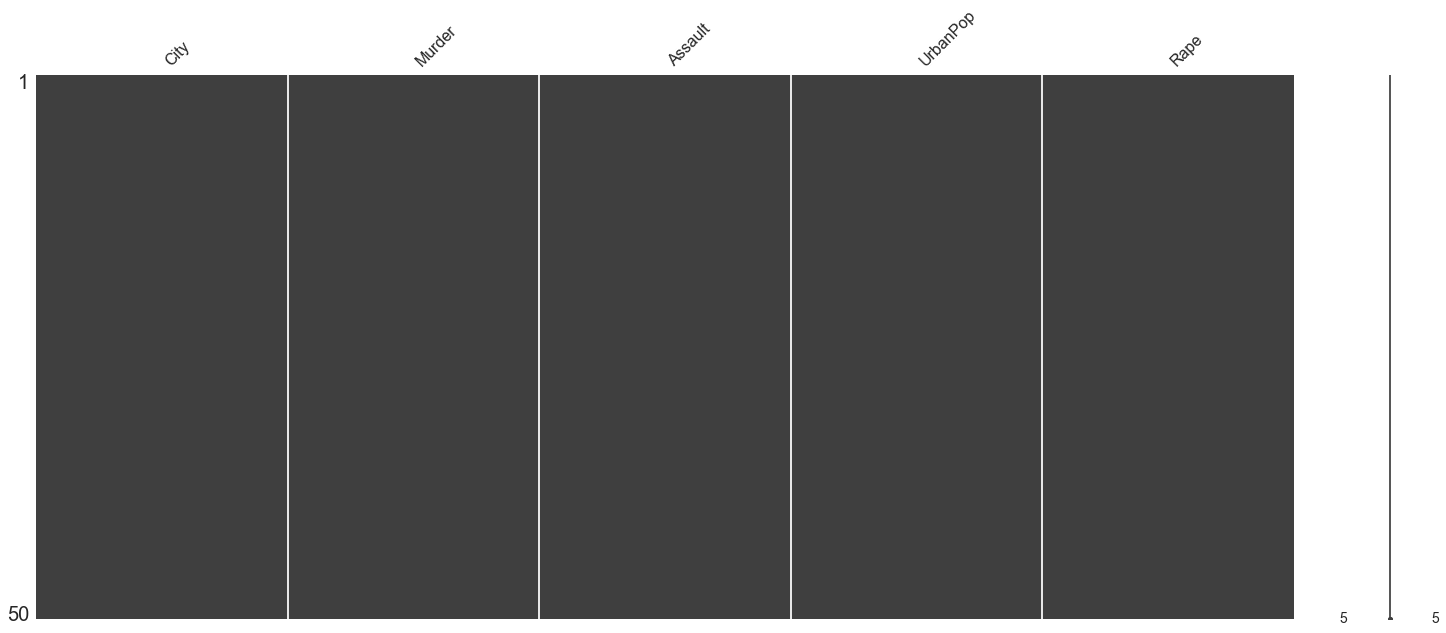

In [160]:
# Check for missing data
# import the library for missingno
import missingno

# Graphical representation of the data
missingno.matrix(data)

In [161]:
# Check the data types
data.dtypes

City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

**there are no data missing from this dataset. No NANs and no nulls. The dataset is clean with all the correct data types**

# Summary Statistics
The data contains 50 rows of data. As you can see the Assault column has quite a large mean and standard deviation. This will greatly impact the machine learning algorithm and scaling the data will be required to provide a good fit.

In [162]:
# display the summary statistics and transpose the data
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.79,4.36,0.8,4.08,7.25,11.25,17.4
Assault,50.0,170.76,83.34,45.0,109.00,159.00,249.00,337.0
UrbanPop,50.0,65.54,14.47,32.0,54.50,66.00,77.75,91.0
Rape,50.0,21.23,9.37,7.3,15.08,20.10,26.17,46.0


# Pairplot
The pairplot is displays the distribution of the data. We can see that Murder and UrbanPop distribute normally. We can also see that the general trend here is that as the UrbanPop increase so do the crime, especially in areas of Rape and Assault.
With assault there is a high trend of Rape associtated.

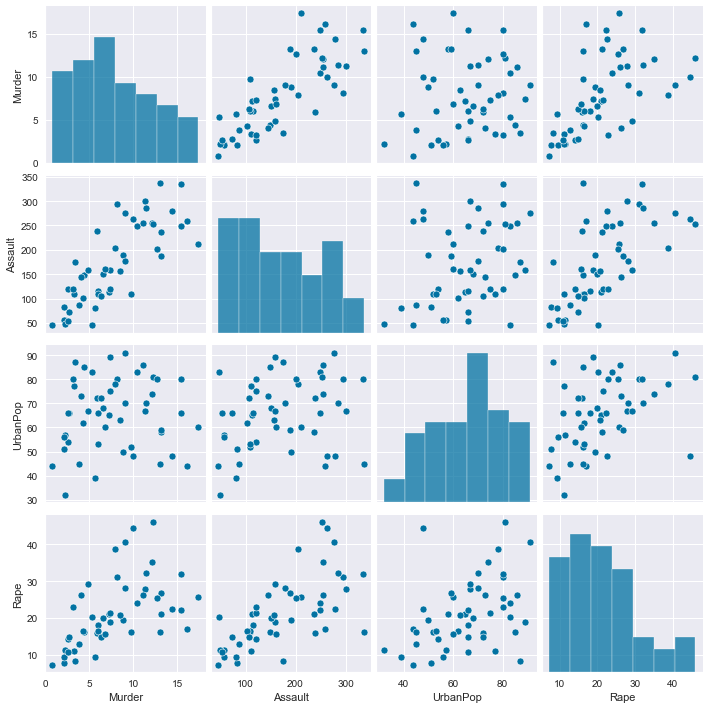

In [163]:
sns.pairplot(data)

**In order to take a closer look at the distributions per city, we need to set the city as the Index.**

In [164]:
# set the city as the index
data2 = data.copy()
data2.index = data2['City']
data2 = data2.iloc[:, 1:5]
data2.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## **This function passes in the data, the specific column and the title and then draws a bar plot explaining the distribution**

In [165]:
def bar_plot(y, data2, title):
    
    # generate a blank plot
    fig, ax = plt.subplots(figsize=(13,5))

    # generate bar plot in the blank plot
    ax = sns.barplot(x=data2.index, y=data2[y] ,data=data2)
    
    ax.set_title(title)

    # set the axis with a list of string labels get_xticklabels(), and set the rotation 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

## Distribuption of **Murder** Per 100K per City

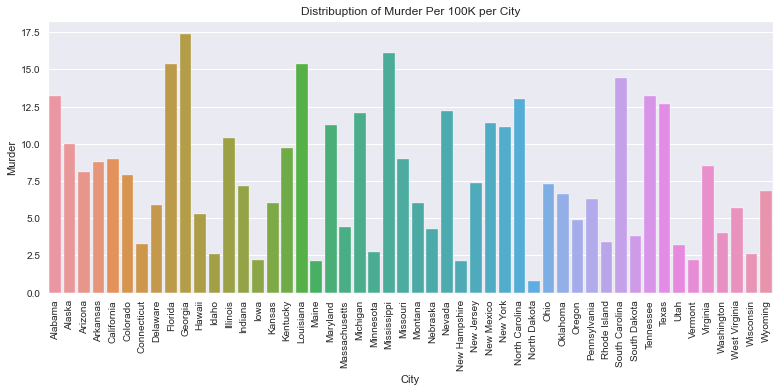

In [166]:
title = "Distribuption of Murder Per 100K per City"
bar_plot(y='Murder', data2=data2, title=title)

## Distribuption of **Assault** Per 100K per City

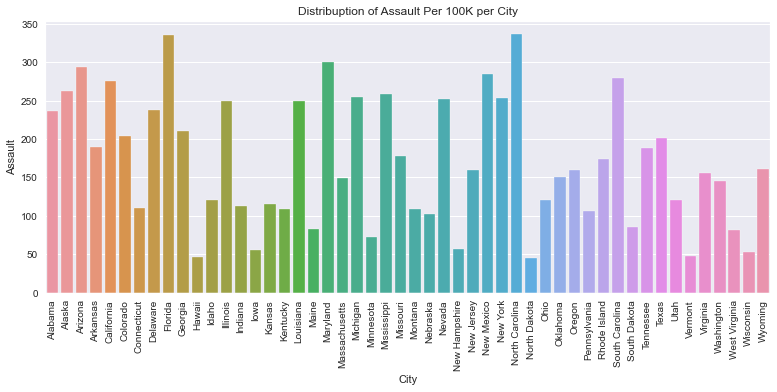

In [167]:
title = "Distribuption of Assault Per 100K per City"
bar_plot(y='Assault', data2=data2, title=title)

## Distribuption of **Urban Population** per City

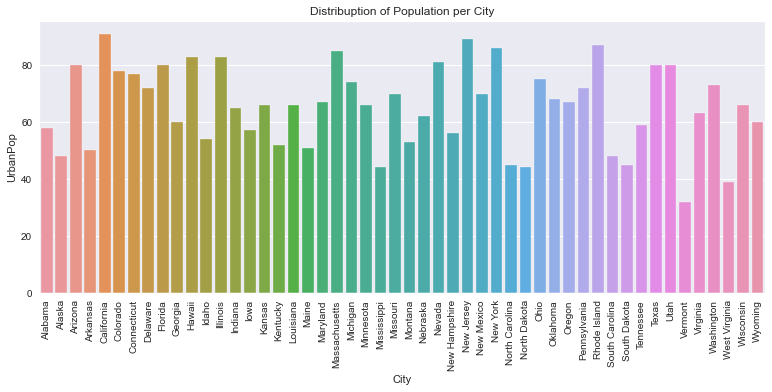

In [168]:
title = "Distribuption of Population per City"
bar_plot(y='UrbanPop', data2=data2, title=title)

## Distribuption of **Rape** Per 100K per City

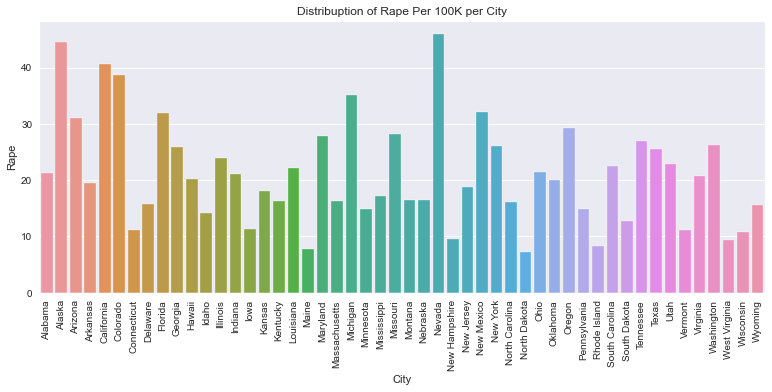

In [169]:
title = "Distribuption of Rape Per 100K per City"
bar_plot(y='Rape', data2=data2, title=title)

# Boxplots


Text(0, 0.5, 'Count')

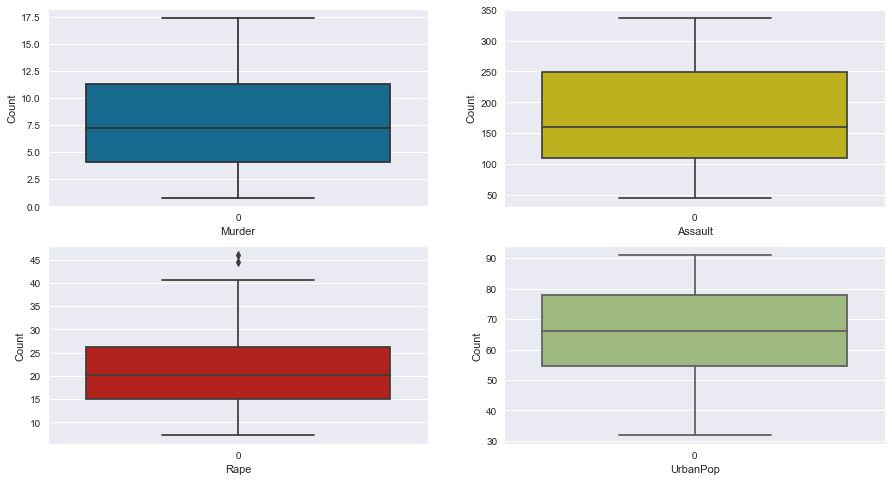

In [170]:
# Boxplots
fig, ax = plt.subplots(2,2, figsize=(15,8))

# Murder Count
sns.boxplot(data=data2['Murder'], ax=ax[0,0])
ax[0,0].set_xlabel("Murder")
ax[0,0].set_ylabel("Count")

# Assault Count
sns.boxplot(data=data2['Assault'], color='y' , ax=ax[0,1])
ax[0,1].set_xlabel("Assault")
ax[0,1].set_ylabel("Count")

# Rape Count
sns.boxplot(data=data2['Rape'], color='r', ax=ax[1,0])
ax[1,0].set_xlabel("Rape")
ax[1,0].set_ylabel("Count")

# UrbanPop count
sns.boxplot(data=data2['UrbanPop'], color='g' , ax=ax[1,1])
ax[1,1].set_xlabel("UrbanPop")
ax[1,1].set_ylabel("Count")

Text(0, 0.5, 'Count')

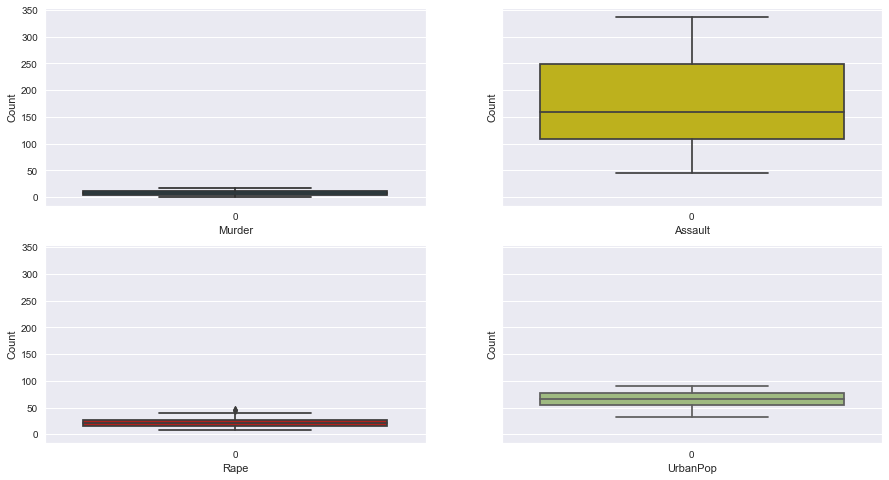

In [171]:
# Boxplots based on teh same Y axis
fig, ax = plt.subplots(2,2, figsize=(15,8), sharey=True)

# Murder Count
sns.boxplot(data=data2['Murder'], ax=ax[0,0])
ax[0,0].set_xlabel("Murder")
ax[0,0].set_ylabel("Count")

# Assault Count
sns.boxplot(data=data2['Assault'], color='y' , ax=ax[0,1])
ax[0,1].set_xlabel("Assault")
ax[0,1].set_ylabel("Count")

# Rape Count
sns.boxplot(data=data2['Rape'], color='r', ax=ax[1,0])
ax[1,0].set_xlabel("Rape")
ax[1,0].set_ylabel("Count")

# UrbanPop count
sns.boxplot(data=data2['UrbanPop'], color='g' , ax=ax[1,1])
ax[1,1].set_xlabel("UrbanPop")
ax[1,1].set_ylabel("Count")

The most noticeable characteristic here is that of the upper quatile (75%) of assault, indicates that a large number of cities experience large amounts of arrests due to assualts. And an interesting outlier for Rape, indicating that even though the average and even upper quatile of arrests due to rape are not as high as assault per say, however there are some cities which experienced extremedly high cases of Rape.

# 3D Scatter plot of Murder, Rape and Assault

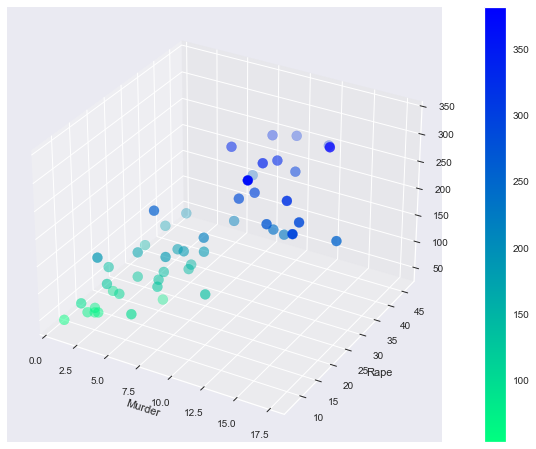

In [172]:
# Import libraries for 3D plot generation
from mpl_toolkits import mplot3d
 
# Define Dataset
x = data['Murder']
y = data['Rape']
z = data['Assault']
 
# Generate the figure
fig = plt.figure(figsize = (15, 8))
ax = plt.axes(projection ="3d")
  
# Create color map
color_map = plt.get_cmap('winter_r')
 
# Create scatter plot and colorbar
scatter_plot = ax.scatter3D(x, y, z, c=(x+y+z), cmap = color_map, s=100)

# display the color map bar
plt.colorbar(scatter_plot)

# set the axis labels
plt.xlabel("Murder")
plt.ylabel("Rape")

plt.show()

# Correlation Analysis

 Again in this plot we can that Assault (Z-Axis) was largly related to rape

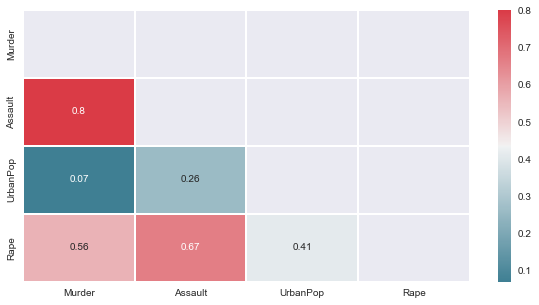

In [173]:
# correlation
corrs = data.corr()

# generate a blank figure
fig, ax = plt.subplots(figsize=(10,5))

# Sets the colour of the heatmap
colour= sns.diverging_palette(220, 10, as_cmap=True)

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(corrs)
dropSelf[np.triu_indices_from(dropSelf)] = True

# generate the heatmap based on the data
ax = sns.heatmap(corrs, annot=True, cmap=colour, mask=dropSelf, linewidths=2)

# ==| **Principal component analysis (PCA)** |==

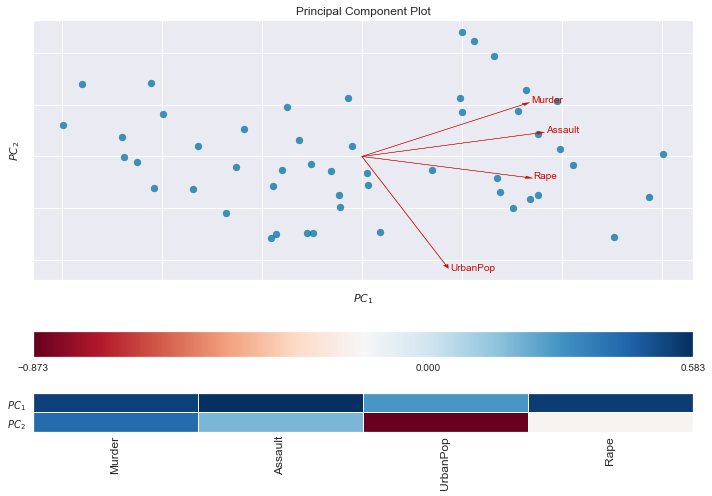

In [174]:
# Biplot
fig. ax = plt.subplots(figsize=(10,7))
visualizer = y_PCA(proj_features=True, heatmap=True)
visualizer.fit_transform(data2)
ax = visualizer.show()

in the feature variation we need to know how much of the components explains at least 90% of the data

In [175]:
# drop the city and make copy of the data
no_city_data = data.drop('City', axis=1)
X_pca = no_city_data

# scale the data
X_pca = preprocessing.scale(X_pca)

In [176]:
# generate instance of PCA and fit the data
pca = PCA().fit(X_pca)

Text(0, 0.5, 'Variance Explained')

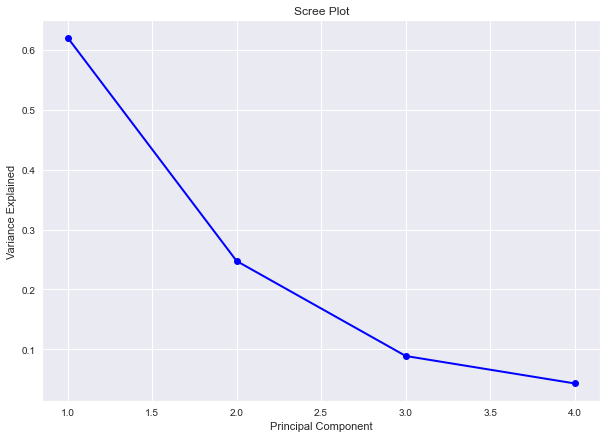

In [177]:
# add 1 so that the components start at 1 and not 0
PC_values = np.arange(pca.n_components_) + 1

# generate subplot to resize the graph
fig, ax = plt.subplots(figsize=(10,7))

# Generate plot of components vs components variance
ax.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

# set the axis titles
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

**The Components was chosen as 3 as this was the optimum components**

In [178]:
# generate instance of the model at 3 components
pca_model = PCA(n_components=3)

# fit the data to the model
principal_components = pca_model.fit_transform(X_pca)

In [179]:
# generate dataframe from the model
pca_df = pd.DataFrame(principal_components, index=data.index)
pca_df.head()

,0,1,2
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [180]:
# get the shape of the model to use in the next part of code
pca_model.components_.shape

(3, 4)

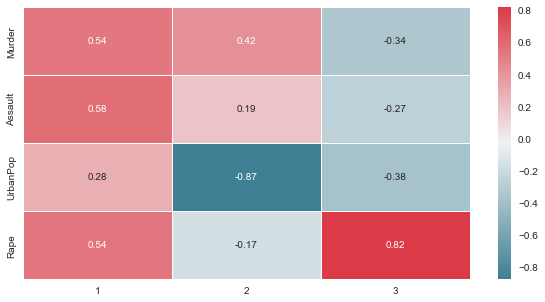

In [181]:
# create dataframe of the PCA components and column features from the original data
# and then transposing it so that they are on the Y -axis
components = pd.DataFrame(pca_model.components_, columns=no_city_data.columns,
                          index=range(1, 4)).transpose()

# Plotting the new datafrane in a seaborn heatmap
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(components, cmap=colour, linewidth=1, annot=True)

# ==| **Hierarchical Cluster Analysis** |==

## Scale the data

In [182]:
# Select the appropriate data - Murder and Rape (highest degree of crime)
X = data2

# scale the data to fit the model
X = preprocessing.scale(X)

In [183]:
X[0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

## Generate Dendrograms

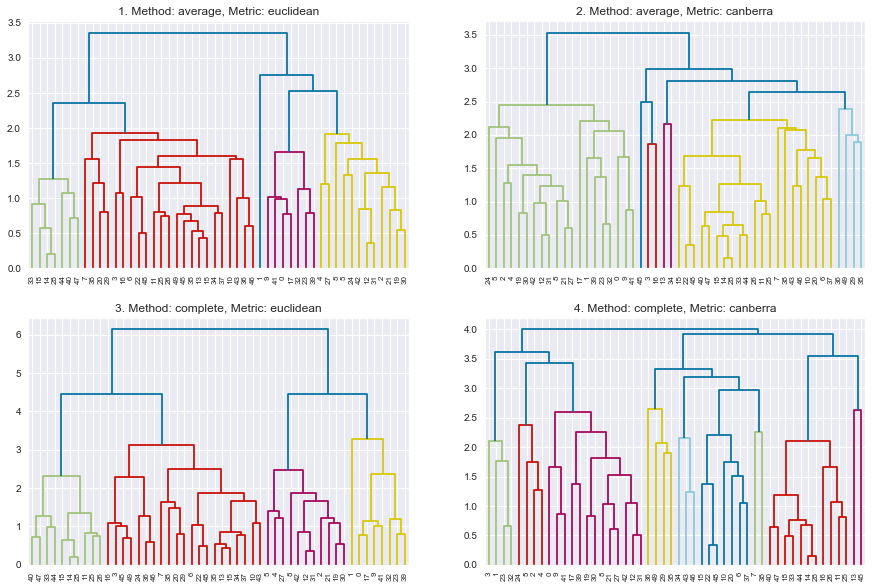

In [184]:
# generate the graph template
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# list of methods and metrics
methods = ['average', 'complete']
metrics = ['euclidean', 'canberra']

# handle axis location and count title number
axis_x=0
axis_y=0
count = 1

# for each method
for method in methods:
    
    # for each metric
    for metric in metrics:
        
        # generate dendrogram of the assigned method and metric from list
        # in subplot
        sch.dendrogram(sch.linkage(X, method=method, metric=metric), 
                                                    ax=ax[axis_x, axis_y])
        
        # set the axis title for each dendrogram
        title = f'{count}. Method: {method}, Metric: {metric}'
        ax[axis_x, axis_y].set_title(title)
        
        # increase count for each dendrogram
        count += 1
        
        # change the y axis to selct the second subplot
        axis_y += 1
        
    # reset the y axis so that the first subplot can be used
    axis_y = 0
    
    # select the second row by changing the value to 1
    axis_x += 1

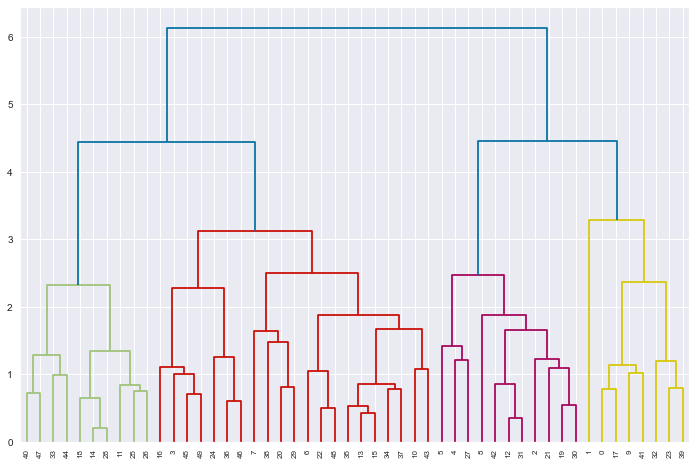

In [207]:
fig, ax = plt.subplots(figsize=(12,8))
model_3 = sch.dendrogram(sch.linkage(X, method='complete', metric='euclidean'))

## Agglomerative Hierarchical Clustering

In [197]:
# generate the cluster analysis of 3 clusters
agg_cluster = AgglomerativeClustering(n_clusters=3, 
                                      affinity='euclidean', linkage='complete')

# predict the model
predicted_agg_cluster = agg_cluster.fit_predict(X)

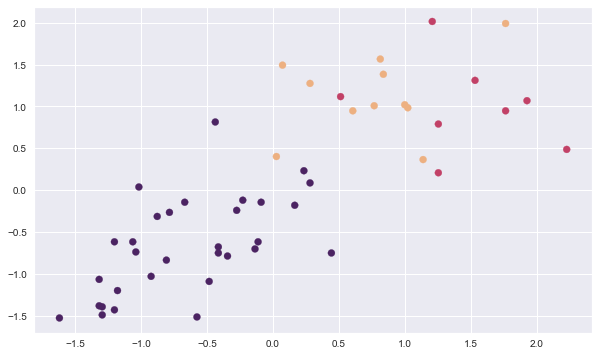

In [198]:
# generate the sub plot
fig, ax = plt.subplots(figsize=(10,6))

# generate the scatter plot
plt.scatter(X[:, 0], X[:,1], c=predicted_agg_cluster, cmap='flare_r')

In [199]:
# Call silhouette method to calculate the goodness of clustering technique
score = round(silhouette_score(X, predicted_agg_cluster), 2)
score

0.37

# ==| **K-Means Cluster Analysis** |==

In [188]:
# select the values of the data
X_kmeans_data = data2.values

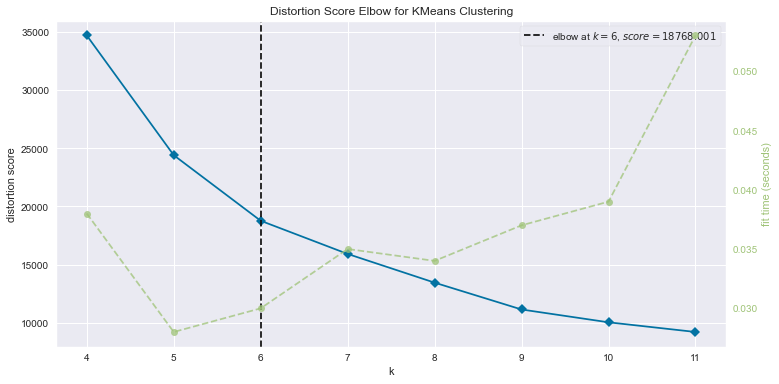

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [189]:
fig, elbow = plt.subplots(figsize=(12,6))
# create instance of the model
elbow_model = KMeans()

# using KElbowVisualizer from yellowbrick library
elbow = KElbowVisualizer(elbow_model, k=(4,12))

# fit all the data to the model to display the elbow plot
elbow.fit(X_kmeans_data)
#plt.legend(loc='upper left')
elbow.show()

## Fit model

In [190]:
# create instance of the model with selected clusters
kmeans_model = KMeans(n_clusters= 6, max_iter=300)

# fit the data to the model
kmeans_y = kmeans_model.fit_predict(X_kmeans_data)
kmeans_y

array([2, 2, 0, 5, 2, 5, 4, 2, 0, 5, 3, 4, 2, 4, 3, 4, 4, 2, 3, 0, 1, 2,
       3, 2, 5, 4, 4, 2, 3, 1, 2, 2, 0, 3, 4, 1, 1, 4, 1, 2, 3, 5, 5, 4,
       3, 1, 1, 3, 3, 1])

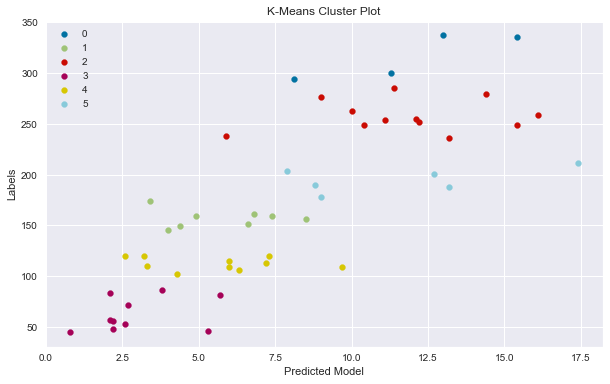

In [191]:
# Get the Centroids
centroids = kmeans_model.cluster_centers_

# Get unique labels 
u_labels = np.unique(kmeans_y)

# Generate subplot to manipulate the dimensions
fig, ax = plt.subplots(figsize=(10,6))
 
# for each unique label plot the results:
for i in u_labels:
    
    # generate scatter plot of the data
    plt.scatter(X_kmeans_data[kmeans_y == i , 0] , 
                X_kmeans_data[kmeans_y == i , 1] , label = i, s=35)

# reposition the legend
plt.legend(loc='upper left')

# set the axis titles
plt.title('K-Means Cluster Plot')
plt.xlabel('Predicted Model')
plt.ylabel('Labels')
plt.show()

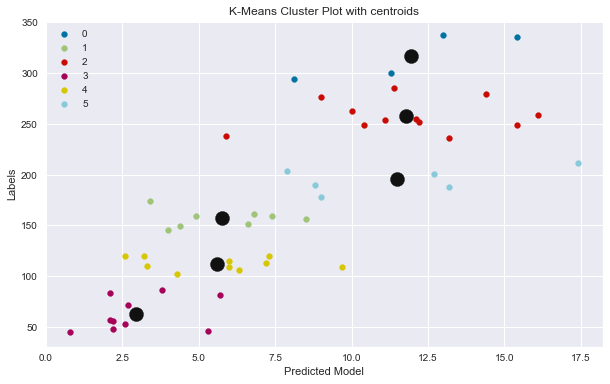

In [192]:
# Get the Centroids
centroids = kmeans_model.cluster_centers_

# Get unique labels 
u_labels = np.unique(kmeans_y)

# Generate subplot to manipulate the dimensions
fig, ax = plt.subplots(figsize=(10,6))
 
# for each unique label plot the results:
for i in u_labels:
    
    # generate scatter plot of the data
    plt.scatter(X_kmeans_data[kmeans_y == i , 0] , 
                X_kmeans_data[kmeans_y == i , 1] , label = i, s=35)

# plot the centroids at size 200 in black
plt.scatter(centroids[:,0] , centroids[:,1] , s = 200, color = 'k')

# reposition the legend
plt.legend(loc='upper left')

# set the axis titles
plt.title('K-Means Cluster Plot with centroids')
plt.xlabel('Predicted Model')
plt.ylabel('Labels')
plt.show()

In [193]:
# call silhouette function to get the score
S_score = round(silhouette_score(X_kmeans_data, kmeans_y), 2)
S_score

0.45

# REF:
Elbow technique: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

PCA biplot: https://www.scikit-yb.org/en/latest/api/features/pca.html

Scatter and clusters: https://www.askpython.com/python/examples/plot-k-means-clusters-python